In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration

## evaluation
from sklearn.metrics import rand_score
from sklearn.metrics import silhouette_score

##other stuff
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"C:\Users\emads\OneDrive\Desktop\BCIT\4\AI\cluster_data_file.csv")

In [5]:
print(df.shape)
df.head()

(600, 2)


,X,Y
0,395.908476,1881.345540
1,526.572509,882.890512
2,697.924840,1027.401777
3,322.677442,470.364808
4,297.723100,530.346059


In [6]:
df.describe()

,X,Y
count,600.000000,600.000000
mean,517.494255,1033.200672
std,152.355523,485.478547
min,185.639413,442.571350
25%,379.037459,565.335799
50%,540.252596,916.853202
75%,694.388260,1049.593439
max,750.201186,1904.382670


In [7]:
df.describe().iloc[[3,7]]

,X,Y
min,185.639413,442.57135
max,750.201186,1904.38267


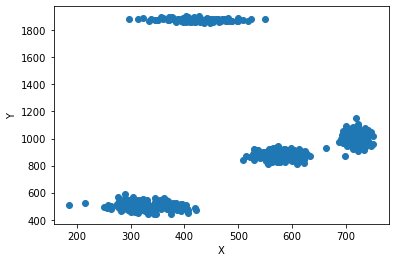

In [8]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

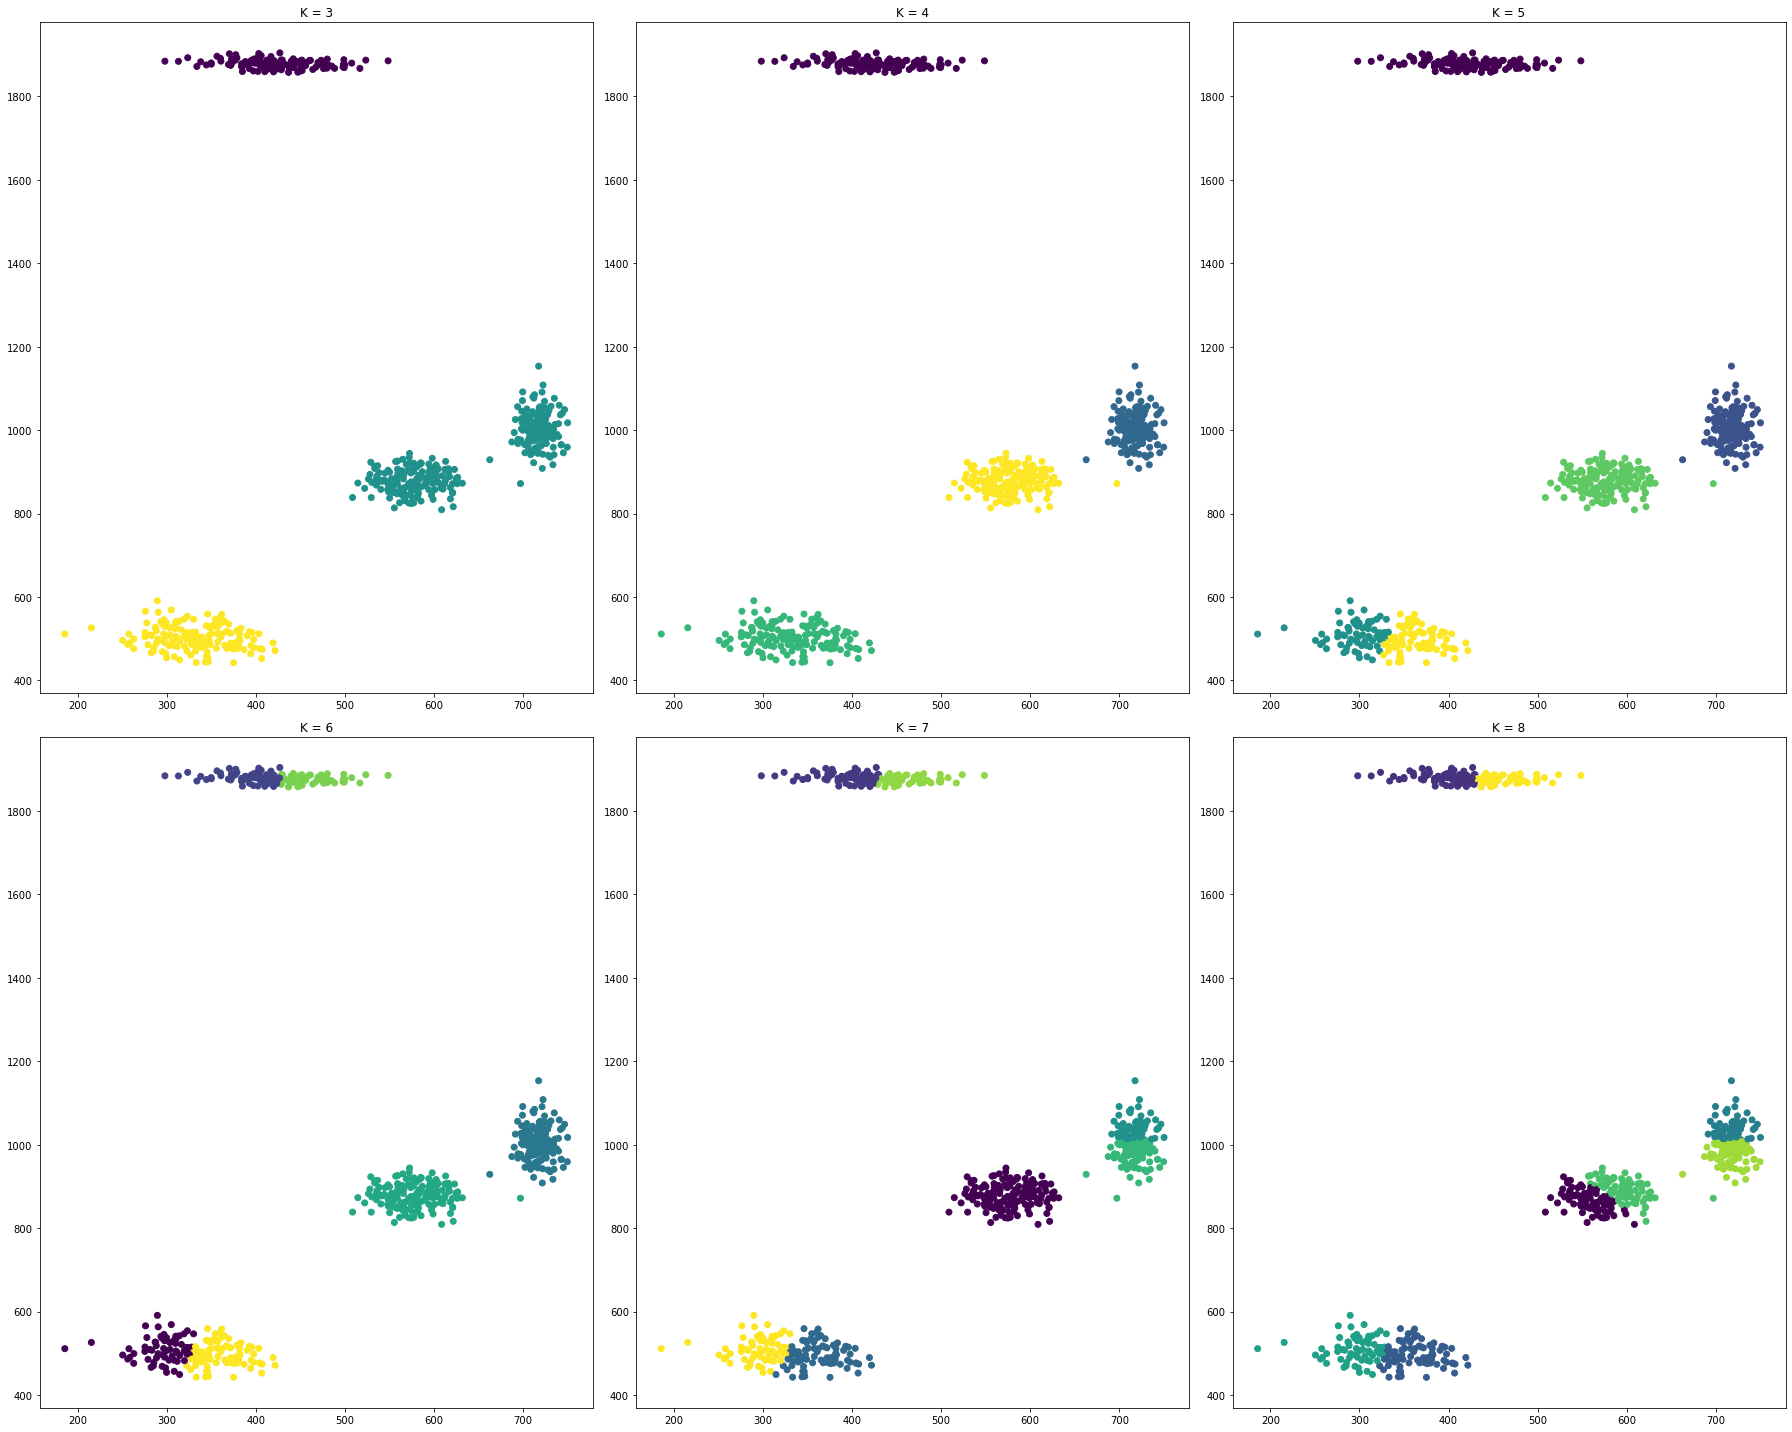

[0.836974271098988, 0.8128371650032797, 0.6911040314525544, 0.5913393416549427, 0.5156198742186687, 0.42173246925132074]


In [9]:
w=df.values
## Use teh silhouette score to see which k is best. 
scores = []

fig, axs = plt.subplots(2, 3, figsize=(25,20))
axs = axs.flatten()

for i, k in enumerate(range(3, 9)):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(w)
    score = silhouette_score(w, labels)
    scores.append(score)
    axs[i].scatter(w[:,0], w[:,1], c=labels)
    axs[i].set_title("K = {}".format(k))

plt.tight_layout()
plt.show()

# Print the silhouette scores
print(scores)

In [10]:
max_index = scores.index(max(scores))
print("The maximum value in the scores list is:", max(scores))
print("The index of the maximum value is:", max_index)


The maximum value in the scores list is: 0.836974271098988
The index of the maximum value is: 0


In [12]:
print(df.shape)
df=pd.read_csv(r"C:\Users\emads\Downloads\Cluster_data_2.csv")
df.head()


(600, 7)


,n,CLUSTER,X1,X2,X3,X4,X5
0,1,4,414.274551,183.313600,402.461117,204.629791,182.770666
1,2,4,408.858419,188.104810,400.947306,184.006465,179.488550
2,3,6,884.298532,245.378507,896.877530,204.847048,208.322498
3,4,7,923.101006,98.612232,945.305606,93.055072,114.891881
4,5,1,997.420209,342.480269,1012.344236,334.393390,304.547229


In [13]:
df.describe()

,n,CLUSTER,X1,X2,X3,X4,X5
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.971667,840.764824,273.491104,841.656482,272.220042,274.011131
std,173.349358,2.000216,206.165073,93.986783,206.744128,94.408273,93.325104
min,1.000000,1.000000,379.955361,71.889335,382.759942,80.523624,81.013891
25%,150.750000,2.000000,662.193073,199.241270,663.202527,202.051236,199.917825
50%,300.500000,4.000000,936.287524,314.614196,936.366482,314.642932,314.699432
75%,450.250000,6.000000,988.800274,344.956837,992.409685,343.184301,344.406140
max,600.000000,7.000000,1039.497191,416.122364,1037.574156,410.084037,416.745757


In [14]:
df2 = df.iloc[:, 2:]

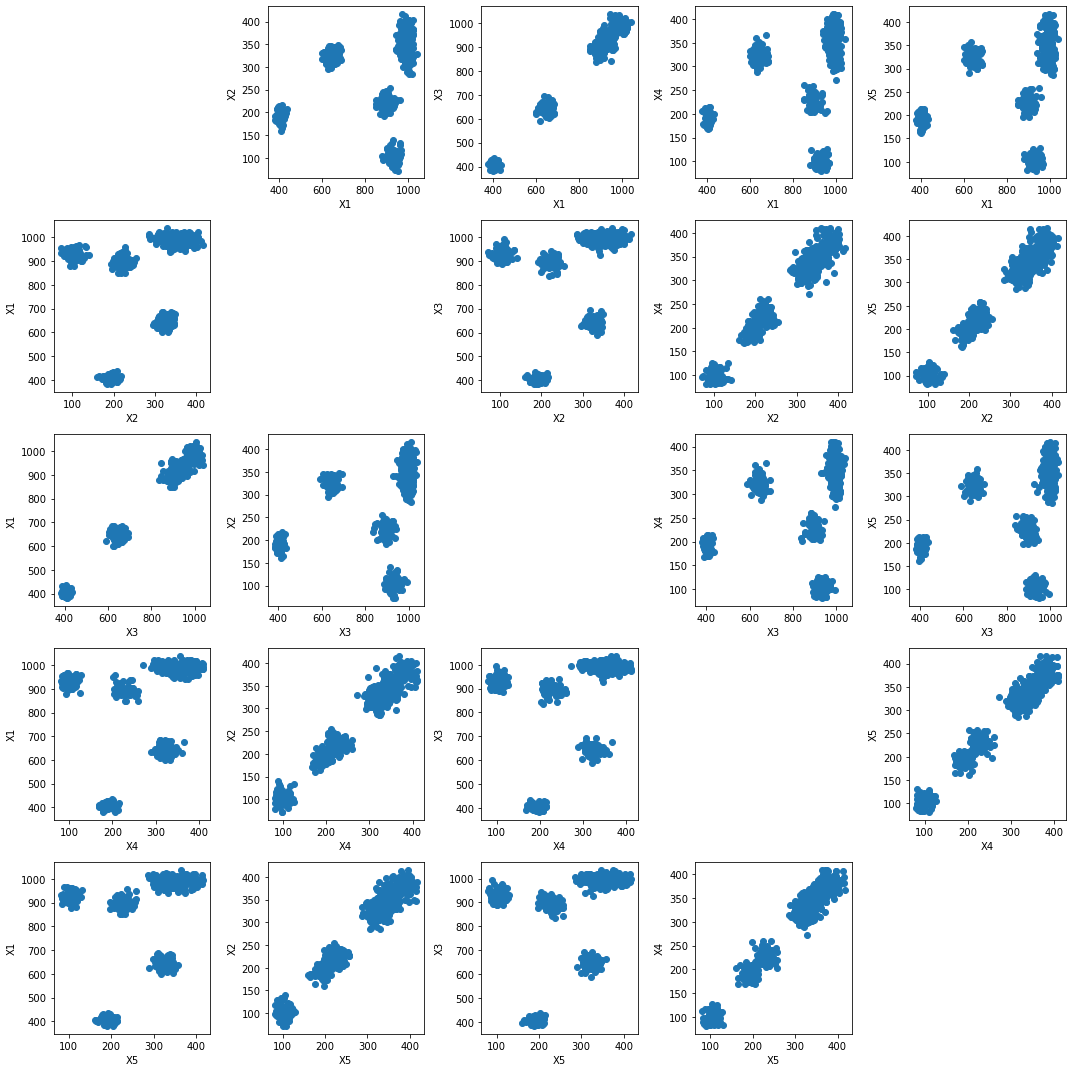

In [15]:
cols = 5
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):
        if i != j:
            ax[i,j].scatter(df2.iloc[:,i], df2.iloc[:,j])
            ax[i,j].set_xlabel(f"X{i+1}")
            ax[i,j].set_ylabel(f"X{j+1}")
        else:
            fig.delaxes(ax[i,j])

plt.tight_layout()
plt.show()

In [16]:
X = df2
Y = df['CLUSTER']
## Hierarchical Model:

agnes =AgglomerativeClustering(distance_threshold = 1000, n_clusters=None)
Y_pred = agnes.fit_predict(X)
print("Number of clusters: ", agnes.n_clusters_)

print("rand score: ", rand_score(Y, Y_pred))

print("The silhouette Score is: ",silhouette_score(X, Y_pred))

print("Hyperparameters: ",agnes.get_params())
      
print("Leaves: ",agnes.n_leaves_)

print("Features used: ",agnes.n_features_in_)

Number of clusters:  5
rand score:  0.869827490261547
The silhouette Score is:  0.7851253369125382
Hyperparameters:  {'affinity': 'euclidean', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': 1000, 'linkage': 'ward', 'memory': None, 'n_clusters': None}
Leaves:  600
Features used:  5


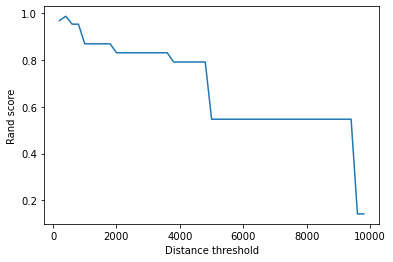

In [17]:
distance_thresholds = np.arange(200, 10000, 200)
rand_scores = []
silhouette_scores = []

# Compute Rand scores for each distance threshold
for distance_threshold in distance_thresholds:
    agnes = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None)
    Y_pred = agnes.fit_predict(X)
    rand = rand_score(Y, Y_pred)
    rand_scores.append(rand)

# Plot the Rand scores as a function of the distance threshold
plt.plot(distance_thresholds, rand_scores)
plt.xlabel('Distance threshold')
plt.ylabel('Rand score')
plt.show()

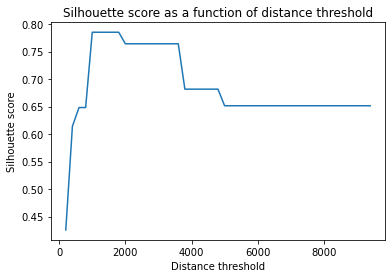

In [18]:
distance_thresholds = np.arange(200, 10000, 200)
silhouette_scores = []

# Compute silhouette scores for each distance threshold
for distance_threshold in distance_thresholds:
    agnes = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None)
    Y_pred = agnes.fit_predict(X)
    unique_labels = np.unique(Y_pred)
    if len(unique_labels) < 2:
        silhouette_scores.append(np.nan)
        continue
    silhouette = silhouette_score(X, Y_pred)
    silhouette_scores.append(silhouette)

# Plot the silhouette scores as a function of the distance threshold
plt.plot(distance_thresholds, silhouette_scores)
plt.xlabel('Distance threshold')
plt.ylabel('Silhouette score')
plt.title('Silhouette score as a function of distance threshold')
plt.show()

In [19]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

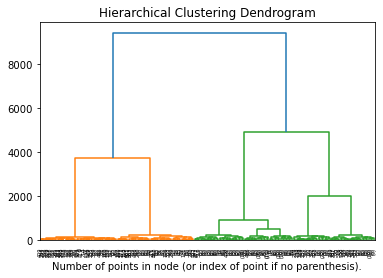

In [20]:
agnes2 =AgglomerativeClustering(distance_threshold = 1800, n_clusters=None)
Y_pred = agnes2.fit_predict(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agnes2, truncate_mode="level", p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

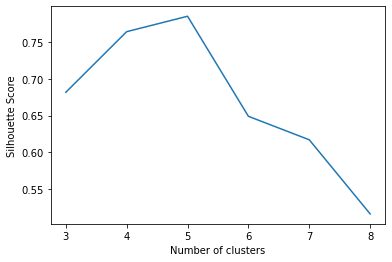

In [21]:
silhouette_scores = []
for k in range(3, 9):
    kmeans = KMeans(n_clusters=k, random_state= 2023)
    kmeans.fit(df2)
    silhouette_scores.append(silhouette_score(df2, kmeans.labels_))
    

plt.plot(range(3, 9), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

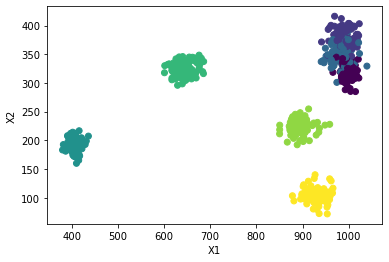

In [22]:
kmeans = KMeans(n_clusters=5)

# Fit the K-Means model to the data
kmeans.fit(df2)

# Predict the cluster for each data point
predictions = kmeans.predict(df2)

# Add the predicted cluster to the dataframe
df["Cluster"] = predictions

# Plot the data points colored by their cluster
plt.scatter(df2["X1"], df2["X2"], c=df["CLUSTER"], cmap="viridis")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

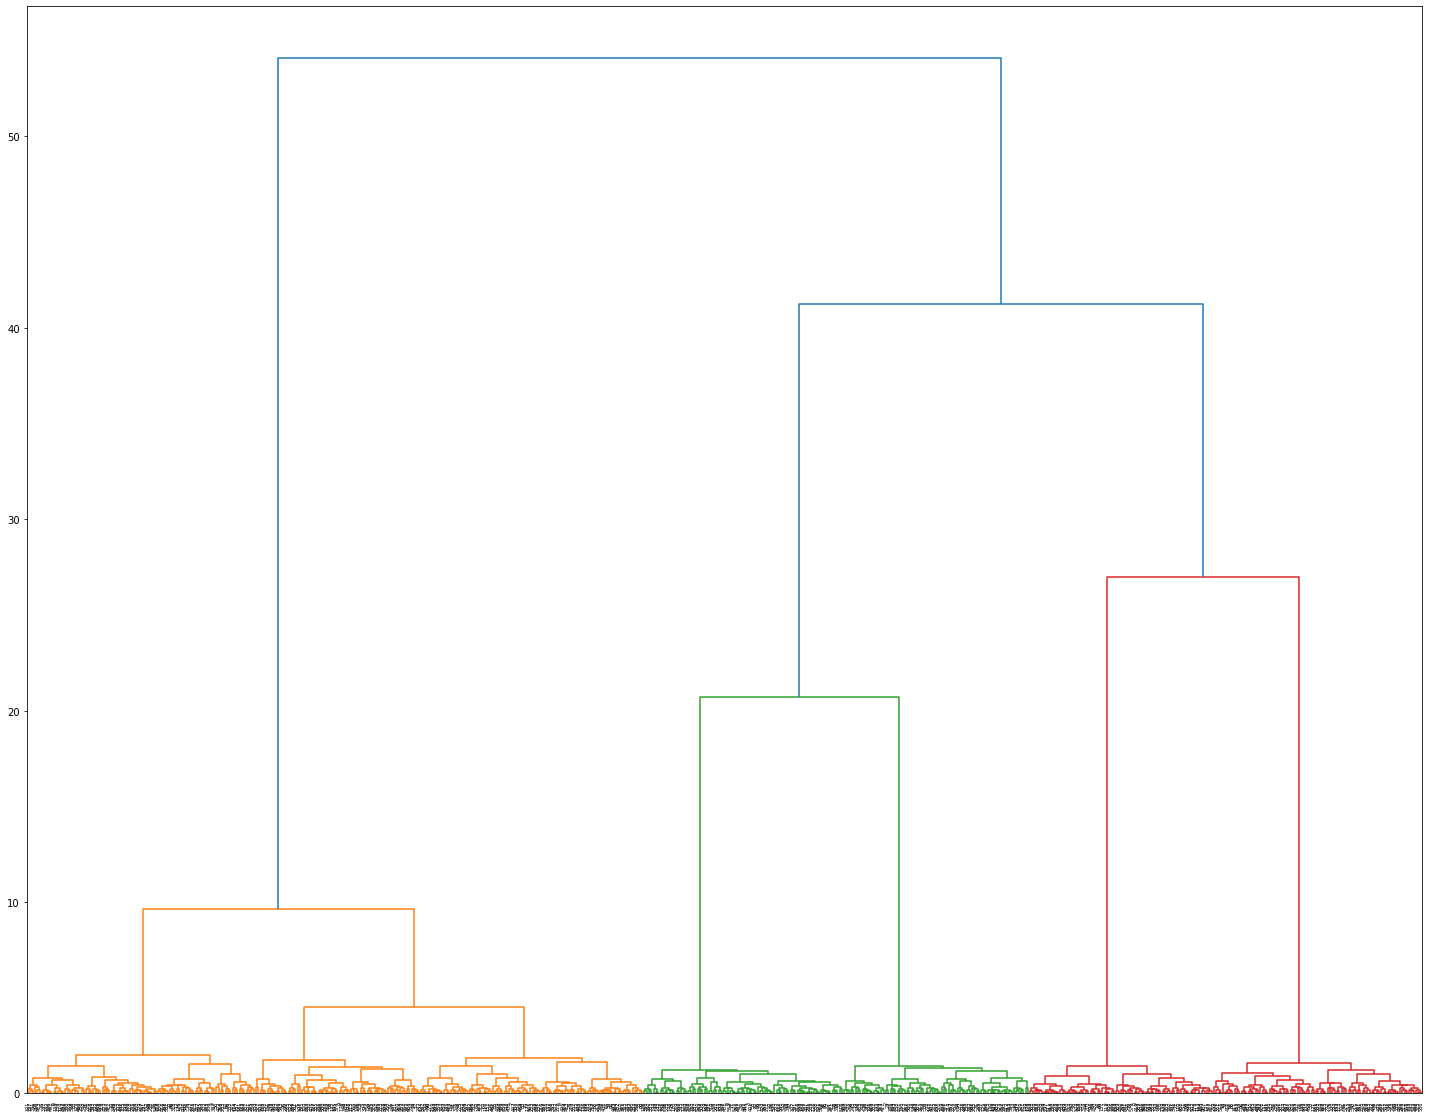

In [23]:
norm_df = (df2 - df2.mean()) / df2.std()
kmeans = KMeans(n_clusters=5)
kmeans.fit(norm_df )


w = linkage(norm_df , method='ward')
plt.figure(figsize=(25, 20))
dendrogram(w)
plt.show()